In [1]:
# so among the most common supervised learning tasks, after regression(can use many different algorithms), here comes 
# classification systems

In [2]:
# MNIST DATASET

In [3]:
from sklearn.datasets import fetch_openml
mnist=fetch_openml('mnist_784',version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
print(type(mnist.data))
print(type(mnist.target))
print(type(mnist.data.dtypes)) # float64
print(type(mnist.target.dtypes)) # strings

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.dtypes.dtypes.CategoricalDtype'>


In [5]:
# so the dataset is basically pandas dataframe and can be used using data attribute of the mnist class


In [6]:
# the datasets included using scikit learn generally have the same kind of dictionary structure including
# a desc key describing the dataset
# a data key containing an array with one row per instance and one column per feature
# a target key containing an array with the labels 

In [7]:
X,y=mnist["data"],mnist["target"]
X.shape

(70000, 784)

In [8]:
y.shape

(70000,)

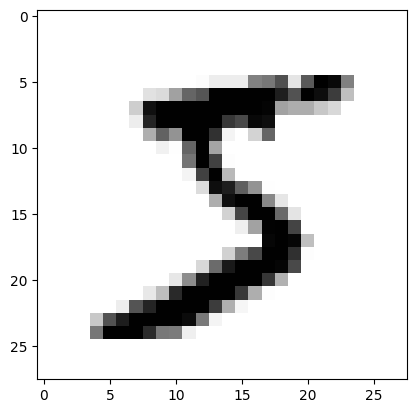

In [9]:
# this basically says there are 70000 imagaes, with each having 28*28=784 features , ie, each feature 
# simply represents one pixel's intensity from 0(white) to 255(black)
# let's see one instance , how it looks: grab instance's feature vector, reshape it to 28*28 array an display using matplotlib
import pandas
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
some_digit=X.iloc[0].to_numpy()
some_digit_image=some_digit.reshape(28,28)
plt.imshow(some_digit_image,cmap="binary")
#plt.axis("off")
plt.show()

In [10]:
y[0]

'5'

In [11]:
# this is what most ml models would need too, converting  the y to integer
import numpy as np
y=y.astype(np.uint8)

In [12]:
X_train,X_test, y_train,y_test=X[:60000],X[60000:],y[:60000],y[60000:]
# mnist initial 60000 images are for training, already split 
# shuffle the training set , for cross validation folds will be similar, some models are sensitive to order of training instances
import numpy as np 
shuffle_index=np.random.permutation(60000)
X_train,y_train=X_train.iloc[shuffle_index],y_train.iloc[shuffle_index]

In [13]:
# model for determining whether it is 5 or not, kinda binary classifer 
y_train_5=(y_train==5)
y_test_5=(y_test==5)

In [14]:
# will see Stochastic Gradient Descent (SGD) classifier, 
# class in scikit learn can handle very large datasets efficiently
# SGD deals with training instances independently, one at a time,i.e., suitable for online learning too
from sklearn.linear_model import SGDClassifier
sgd_clf=SGDClassifier(random_state=42)
#y_train_5=y_train_5.to_numpy().ravel()
sgd_clf.fit(X_train,y_train_5)


SGDClassifier(random_state=42)

In [15]:
# sgd relies on randomness during training so for reproducible results, set the random state parameter
some_digit = X.iloc[0].values.reshape(1, -1)  
sgd_clf.predict(some_digit)

/home/abhinavpc/Desktop/ML/eduml/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([False])

In [16]:
# let's check the performance 
# often it is trickier than evaluating a regressor,
# there are many performance variables and will see them throughout the chapter


In [17]:
# 1. CROSS VALIDATION
    # can implement by slef to have more control
from sklearn.model_selection import StratifiedKFold 
from sklearn.base import clone
skfolds=StratifiedKFold(n_splits=3,random_state=42,shuffle=True)
for train_index,test_index in skfolds.split(X_train,y_train_5):
    clone_clf= clone(sgd_clf)
    X_train_folds=X_train.to_numpy()[train_index]
    y_train_folds=y_train_5[train_index]
    X_test_fold=X_train.to_numpy()[test_index]
    y_test_fold=y_train_5[test_index]

    clone_clf.fit(X_train_folds,y_train_folds)
    y_pred=clone_clf.predict(X_test_fold)
    n_correct=sum(y_pred==y_test_fold)
    print(n_correct/len(y_pred))    

0.74645
0.74405
0.911


In [18]:
# STRATIFIED K FOLDS
# 1. Splitting the data into 5 folds for StratifiedKFold cross-validation
# 2. Iterations:
#    Iteration 1: Train on folds 2, 3, 4, 5 → Test on fold 1
#    Iteration 2: Train on folds 1, 3, 4, 5 → Test on fold 2
#    Iteration 3: Train on folds 1, 2, 4, 5 → Test on fold 3
#    Iteration 4: Train on folds 1, 2, 3, 5 → Test on fold 4
#    Iteration 5: Train on folds 1, 2, 3, 4 → Test on fold 5

# 3. Average performance is computed by averaging the results across all 5 validation sets
# 4. Once the cross-validation is complete, we train the final model on the entire dataset
#    This final model will now use all available data (both training and validation data)
#    to improve its learning and generalize better for future predictions.

# essence of the process :
process="""
Recap of the Process:

1.  Cross-Validation: By using cross-validation, you effectively split the dataset into multiple parts, 
    allowing you to train and validate your models in a way that helps prevent overfitting. Each fold serves 
    as a separate validation set, providing insights into how well each model generalizes to unseen data.

2.  Model Selection: The model that performs well across the different folds is likely to be more robust 
    and less likely to overfit because it has been tested against various subsets of the data. This is crucial 
    because it gives you confidence that the model isn’t just memorizing the training data.

3.  Final Model Training: After identifying the best-performing model through cross-validation, you can 
    then train this model on the entire dataset. This final training allows the model to learn from all 
    available data, which can improve its performance even further.

Key Benefits:

*   Reduced Overfitting: Since you are validating the model's performance on different subsets of data, 
    it ensures that the model is generalizing well rather than simply fitting the noise in the training data.

*   Informed Decision-Making: By evaluating multiple models or configurations during cross-validation, 
    you can make informed decisions about which model to finalize, based on their actual performance 
    rather than assumptions or isolated evaluations.

*   Maximizing Data Usage: Training on the full dataset after selecting the best model allows you to 
    leverage all available data for learning, which can enhance predictive power.

Summary:

In essence, cross-validation serves as a safeguard against overfitting and helps you identify the 
most suitable model for your problem. The final training phase then capitalizes on this selection, 
ensuring that the model you deploy is well-trained and effective for making predictions on unseen data.
"""


In [19]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,X_train,y_train_5,cv=3,scoring="accuracy")

array([0.96  , 0.9595, 0.9645])

In [20]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self,X,y=None):
        return self
    def predict(self,X):
        return np.zeros((len(X),1),dtype=bool)

In [21]:
# so this is our never 5 classifier
never_5_clf=Never5Classifier()
cross_val_score(never_5_clf,X_train,y_train_5,cv=3,scoring="accuracy")

array([0.9084 , 0.90885, 0.9117 ])

In [22]:
# this is because only  10 percent of the images are 5,
# that is why accuracy isn't preferred performance measure for classifiers , especially when dealing with skewed datasetss, ie, so classes more frequent than other
# Accuracy is misleading in imbalanced datasets since it doesn't capture the model's performance on minority classes.
# It doesn't differentiate between false positives and false negatives, which may be crucial in specific applications.
# Metrics like precision, recall, F1-score, and AUC-ROC are preferred for better insights, especially in imbalanced or critical cases.


In [23]:

#CONFUSION MATRIX


In [24]:
# count numebr of times instance of class A are classfied as Class B.ie, e.g. how many number of times 
# did model confused image sof 5 with 3, we would like to look fifth row and 3rd column of the confusion  matrix

# let's see, but using cross validation for now, since don't want to use the test set

from sklearn.model_selection import cross_val_predict
y_train_pred=cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)
# here, cross_val_predict don't give the evaluation scores like cross_val_score(), rather  it gives the clean predictions, ie, predictions by model on never saw data during the training


In [25]:
# final step to get confusion matrix: pass target class and prediction into the function
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5,y_train_pred)
# means, pass output, prediciton format

array([[53540,  1039],
       [ 1281,  4140]])

In [26]:
# row means actual class, and column means predicted
# 53868 are correctly classified as non-5 (true negatives), 711 were wrongly classified as 5(false positives)
# now, the second row, means images of 5s (positive class), 

In [27]:
# but it is not concise, 
# precision and recall:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5,y_train_pred)

np.float64(0.7993821201004054)

In [28]:
recall_score(y_train_5,y_train_pred)

np.float64(0.7636967349197565)

In [29]:
# damn things far below 90 percent numbers now,so if model claims a number 5, it is correct 88.5 percent of times actually
# and it only detect 55.45 percent of 5s


In [30]:
# we have F1 score as comnination of both to actually compare performance of 2 classfiers
# it is HM of both
from sklearn.metrics import f1_score
f1_score(y_train_5,y_train_pred)

np.float64(0.7811320754716982)

In [31]:
# we need both precision and recall depending upon the case, so we usually trade off the stuff
# we can check decision score for each instance of sgdclassifier and then set the threshold by ourself, since we can't actually do that in ssgd classifier itself
y_scores=sgd_clf.decision_function(some_digit.reshape(1,-1))
y_scores

/home/abhinavpc/Desktop/ML/eduml/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([-758.44875212])

In [32]:
some_digit.shape
import pandas as pd
# the warning is because x train on which model is trained, If X_train and X_test are slices of the original X and X is a pandas DataFrame, then yes, they will also have column labels (i.e., feature names).
# and now, somedigit doesn't have the column labels, and just is a numpy array, as we have extracted it using the iloc method, 
# to resolve the warning, simply can convert it back to the dataframe
some_digit_df = pd.DataFrame(some_digit, columns=X_train.columns)
y_scores=sgd_clf.decision_function(some_digit_df)
y_scores


array([-758.44875212])

In [33]:
# decision function basically, wants data like :
# Example data (X: 2D array, y: labels)
# X_train = [[0.5, 1.2], [1.1, -0.3], [0.3, 0.8]]  # 3 samples, 2 features
# y_train = [0, 1, 0]  # Class labels (binary)
# For multiclass classification, the input to the decision_function() is still a 2D matrix of shape (n_samples, n_features).
# y train too, will be like the categories

# coming upto the output of the decision function

# for multiclass regression, output looks like: [-1630.25,  -282.73,   -79.12,   580.33,  -520.10,   284.43, -802.45,   432.23,   57.90,  1755.34]
# ie; this is for the mnist dataset,This is output on a single input and 1st element represents the decision score for class 0(Digit 0) 
# so when whole input passed, we will get a 2d matrix (instance,scores(size10))



In [34]:
threshold=0
y_some_digit_pred=(y_scores>threshold)
y_some_digit_pred

array([False])

In [35]:
threshold=8999
y_some_digit_pred=(y_scores>threshold)
y_some_digit_pred

array([False])

In [36]:
# raising threshold decreases the recall
# to decide which threshold to use:

# get decision function scores on the input
from sklearn.model_selection import cross_val_predict
y_scores=cross_val_predict(sgd_clf,X_train,y_train_5,cv=3,method="decision_function")

In [37]:
# make precision recall curver()
from sklearn.metrics import precision_recall_curve
precisions,recalls,thresholds=precision_recall_curve(y_train_5,y_scores)

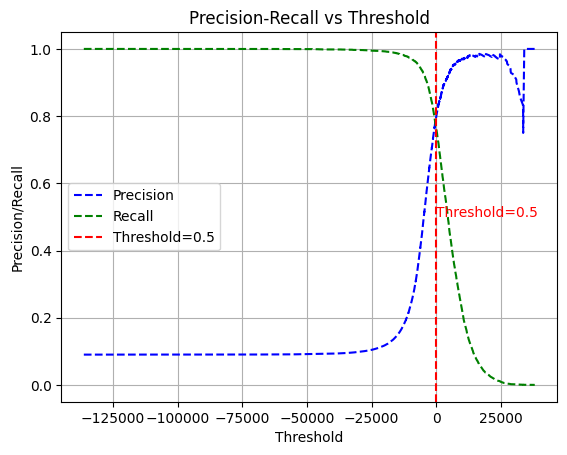

In [38]:
import numpy as np
def plot_precision_recall_vs_threshold(precisions,recalls,threshold):
    plt.plot(thresholds,precisions[:-1],"b--",label="Precision")
    plt.plot(thresholds,recalls[:-1],"g--",label="Recall")
    threshold_highlight=0.5
    plt.axvline(x=threshold_highlight,color="red",linestyle="--",label=f'Threshold={threshold_highlight}')
    plt.text(threshold_highlight+0.05,0.5,f'Threshold={threshold_highlight}',color='red')
    plt.xlabel("Threshold")
    plt.ylabel("Precision/Recall")
    plt.title("Precision-Recall vs Threshold")

    #idx=np.where(threshold==threshold_highlight)[0][0]

    #precision_at_thresh=precisions[idx]
    #recall_at_thresh=recalls[idx]
    #plt.hlines(precision_at_thresh,xmin=thresholds[0],xmax=threshold_highlight,colors='blue',linestyles="--")
    #plt.hlines(recall_at_thresh,xmin=thresholds[0],xmax=threshold_highlight,colors="green",linestyle="--")
    
    plt.legend(loc="best")
    plt.grid(True)
    
plot_precision_recall_vs_threshold(precisions,recalls,thresholds)
plt.show()

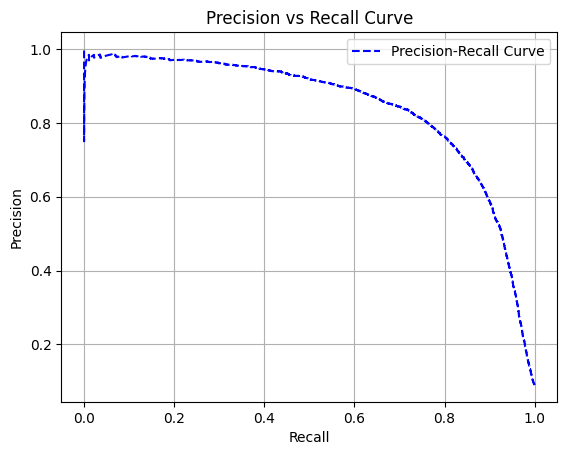

In [39]:
# or can directly plt 
plt.plot(recalls,precisions,"b--",label="Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision vs Recall Curve")
plt.legend(loc='best')
plt.grid(True)
plt.show()

# precision falling shaprly after 80 percent recall
# prob want to select the trade off near it , obv at the end choice is upto your needs
# example: 90 percent precision
# for the score threshold, can look at the first curve or 
threshold_90_precision=thresholds[np.argmax(precisions>=0.90)]
y_train_pred_90=(y_scores>=threshold_90_precision)  # so we basically have the threshold , now we can directly use it on the yscores and tell if it is 5 or not
                 

In [40]:
precision_score(y_train_5,y_train_pred_90)

np.float64(0.9000881575080811)

In [41]:
recall_score(y_train_5,y_train_pred_90)

np.float64(0.5650249031543996)

In [42]:
# this is how we can use a model with wanted precision and recall
# so , every time ask at which precision


In [43]:
# another common tool with binary classifier

# The ROC Curve


In [44]:
# similar to precision recall curve but it uses TPR(recall)vs FPR
# FPR = false positive/(true+false) positive=1-specificity
# where specificity is FNR , false negative rate
# sensitivity vs (1-specificity) it is therefore


In [45]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(y_train_5,y_scores)

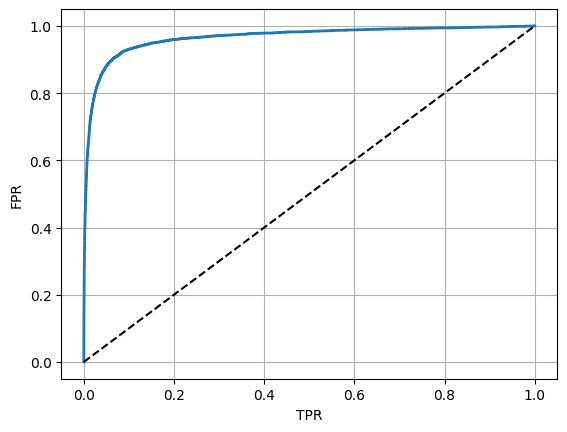

In [46]:
def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.xlabel("TPR")
    plt.ylabel("FPR")
    plt.grid(True)
plot_roc_curve(fpr,tpr)
plt.show()

In [47]:
# again there is a tradeoff and it make sense too
# the diagonal is actually roc curve of a random classifiethreshold_highlight=0.5r, and in every case we have to stay as far as possible from it
# ie. for good classifier we want to be as top left corner as possible
# AUC is used to compare classifiers, max =1 , pure random classifier=0.5

from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5,y_scores)

np.float64(0.9658099886106785)

In [48]:
# always prefer precision/recall against roc curve whenever positive class is rare or when you care more about the false positives than the false negatives,eg shoplifter example
# else the above curve showing high auc , this is because 5 is present in small amount in the data


In [49]:
# random forest classifier
# scikit learn functions generally have predict or predictprob methods

from sklearn.ensemble import RandomForestClassifier

forest_clf=RandomForestClassifier(random_state=42)
y_probas_forest=cross_val_predict(forest_clf,X_train,y_train_5,cv=3,method="predict_proba")

In [50]:
# the roc curve function expects labels and scores, but can give it class probabilities
# let's use the probability of the positive class
y_scores_forest=y_probas_forest[:,1] # for binary classifiers, index 0 and 1 of each instance represents probability of instance being of negative or positive class
fpr_forest,tpr_forest,thresholds_forest=roc_curve(y_train_5,y_scores_forest)


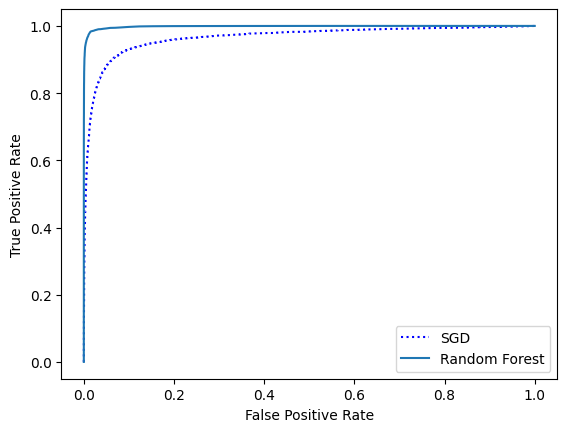

In [51]:
plt.plot(fpr,tpr,"b:",label="SGD")
plt.plot(fpr_forest,tpr_forest,label="Random Forest")
plt.legend(loc="lower right")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [52]:
#ie. random forest is superior to sgd since the roc curve is closer to the top left corner
roc_auc_score(y_train_5,y_scores_forest)

np.float64(0.9983948927856519)

In [53]:
precision_forest,recall_forest,threshold_forest=precision_recall_curve(y_train_5,y_scores_forest)

In [54]:
precision_forest

array([0.09035   , 0.15581168, 0.21757457, 0.27758426, 0.33537604,
       0.39346168, 0.44624897, 0.49861624, 0.54410727, 0.58776712,
       0.62896825, 0.66650149, 0.69534282, 0.72397519, 0.75294613,
       0.77554269, 0.79832936, 0.81625172, 0.83294338, 0.85237258,
       0.86500081, 0.87824219, 0.8881998 , 0.89716613, 0.90356286,
       0.91027196, 0.91789216, 0.92406851, 0.93043168, 0.93725207,
       0.94341339, 0.94752294, 0.95286506, 0.95555969, 0.96008994,
       0.96323529, 0.96715398, 0.97092022, 0.97284284, 0.97516492,
       0.97675781, 0.97876941, 0.97998415, 0.98243162, 0.98432161,
       0.9852406 , 0.98634325, 0.9868691 , 0.98782752, 0.98898816,
       0.98955504, 0.98991385, 0.99132275, 0.99168621, 0.99205156,
       0.99264069, 0.99257804, 0.99318082, 0.99422222, 0.99439085,
       0.99501812, 0.99519671, 0.99538106, 0.99533256, 0.99573561,
       0.99614179, 0.99657115, 0.99652001, 0.99722012, 0.99794767,
       0.99817993, 0.99815352, 0.99812884, 0.99863946, 0.99861

In [55]:
y_pred_forest=(y_scores_forest>=0.10)
precision_score(y_train_5,y_pred_forest)

np.float64(0.628968253968254)

In [56]:
recall_score(y_train_5,y_pred_forest)

np.float64(0.9940970300682531)

In [57]:
# here threshold set again has impact on precision and recall scores as obviously it should be


In [58]:
# so now, ik how to train binary classifiers, choose appropriate metric for the task,evaluate using CV, select precision recall tradeoff that fits the needs, and use roc and roc auc scores to compare various models, for example for the previous example random forest was a better model

In [59]:
#MULTICLASS CLASSIFICATION / multinomial classifiers

In [60]:
# algorithms like sgd classifier, random forest classfier, and naive bayes classifer are able to do multiclass classification
# but eg. logistic regression or svm classifiers aren't binary classifers
# can use multiple binary classifers though to perform multiclass classification
# eg for digit detection, train 10 binary classifier, one for each class
# chose one with the best score for the instance as output, called one vs the rest (OvR) or one vs all strategy

# ONE vs ONE strategy: train n*(n-1)/2 classifers, eg 0 or 1 classifer, 9 or 1 classifer, etc 
# ie, 45 binary classifers for the mnist dataset 
# good thing is no need to train on all the data rather than the data of the 2 particular classes

# some algo eg svm scales poorly with size of the training set, ie, OvO is preferred, since it is faster to train many classifier on small sets vs few on large training sets
# for most binary classification algos, OvR is preferred

# again our goated scikit learn, it detects when we are trying binary classification and so it automatically chooses OvR or OvO
#eg
from sklearn.svm import SVC
svm_clf=SVC()
svm_clf.fit(X_train,y_train)


SVC()

In [61]:
svm_clf.predict(some_digit_df)

array([5], dtype=uint8)

In [63]:
# here it has used OvO strategy, so it trained 45 binary classifiers, got the decision scores for the image and
# selected the class that won most out of the 45 duels
# lets see what we will get from the decision funtion
some_digit_scores=svm_clf.decision_function(some_digit_df)
some_digit_scores

array([[ 1.72501704,  2.72809498,  7.25100409,  8.30763845, -0.31087308,
         9.31324786,  1.70974781,  2.76767539,  6.23049109,  4.84772007]])

In [64]:
# so highest score is for the digit 5 and so that is what it will predict

# what is happening actually here. 
# Train 45 binary classifiers (OvO for 10 digits).
# Predict for a new sample by running it through all 45 classifiers.
# Get votes from each classifier (which digit "wins" the comparison).
# Aggregate scores from the decision function for each class.
# Select the class with the highest decision score as the final prediction.
# so for each binary comparision, apart from what wins we have the score and for the final score of a digit eg 4, i will average all the decision score of 4 that 
#are coming from the classfiers involving 4


In [65]:
np.argmax(some_digit_scores)

np.int64(5)

In [66]:
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [67]:
svm_clf.classes_[5]

np.uint8(5)

In [68]:
# basically here we are lucky that the target classes and indexes are same and aren't bound to be always be like that


In [ ]:
# Forcing to use OvO or OvR
# have to create an instance passing classifier to it as a constructor(doesn't need to be binary necessarily)

#eG: multiclass classifier using OvR strategy based on a SVC
from sklearn.multiclass import OneVsRestClassifier
ovr_clf=OneVsRestClassifier(SVC())
ovr_clf.fit(X_train,y_train)
ovr_clf.predict(some_digit_df)

In [ ]:
len(ovr_clf.estimators_)